<a href="https://colab.research.google.com/github/Ahmah328/Deep-Learning/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import***

In [ ]:
import numpy as np      # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))


# ***Load data***

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum().max()

0

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# ***Data Balance Check***

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud & 1: Fraud)')

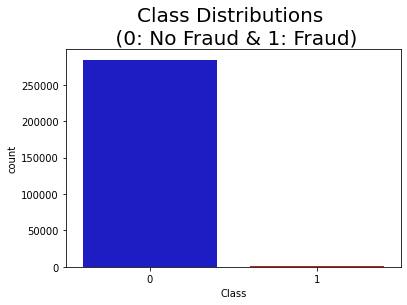

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud & 1: Fraud)', fontsize=20)


# ***Splitting The data into target and other input***

In [ ]:
y = data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
data.drop(columns='Class', inplace=True)

In [ ]:
print(data.shape)
data

(284807, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00



# ***Splitting dataset into Train and Test set***

In [ ]:
X_train = data[:142400]
X_test = data[142400:227840]
X_val = data[227840:]

In [ ]:
Y_train = y[:142400]
Y_test = y[142400:227840]
Y_val = y[227840:]

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(142400, 30)
(142400,)



# ***Normalization***

In [ ]:
X_train.iloc[:,29:].values.mean()

90.68879030898876

In [ ]:
X_train.iloc[:,29:].values.std()

246.46099870046643

In [ ]:
mean =X_train.iloc[:,29:].values.mean()
X_train['Amount'] -= mean

std = X_train.iloc[:,29:].values.std()
X_train['Amount'] /= std

X_test['Amount'] -= mean
X_test['Amount'] /= std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(142400, 30)
(142400,)


In [ ]:
X_train.iloc[:,0:1]

,Time
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
142395,84687.0
142396,84687.0
142397,84688.0
142398,84689.0


In [ ]:
mean =X_train.iloc[:,0:1].values.mean()
X_train['Time'] -= mean

std = X_train.iloc[:,29:].values.std()
X_train['Time'] /= std

X_test['Time'] -= mean
X_test['Time'] /= std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-52402.242205,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239110
1,-52402.242205,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357050
2,-52401.242205,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.168425
3,-52401.242205,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.133129
4,-52400.242205,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142395,32284.757795,-0.720308,-4.195335,0.411812,-0.311117,-2.563613,1.292510,-0.334193,0.365881,2.884359,-1.781717,0.304302,1.450280,-0.844647,-0.620855,-0.921163,-0.943548,0.566416,0.491140,0.957506,1.767588,0.698688,0.445542,-1.027680,-0.147869,0.131970,0.173358,-0.070663,0.176413,3.520805
142396,32284.757795,-0.537152,1.072182,1.316695,1.123155,0.185313,0.105776,0.790742,-0.081411,-0.312631,-0.170547,-0.548610,0.518188,0.498129,-0.173642,-0.047593,-1.138757,0.448663,-0.805301,0.438916,-0.079131,0.056192,0.379248,-0.115989,0.117478,-0.280746,-0.345392,-0.047852,0.152489,-0.237031
142397,32285.757795,-1.091024,0.680341,-0.030040,-1.913987,-0.461060,-0.387802,1.195571,0.276549,0.374670,-1.502426,1.247522,1.821365,0.524183,0.482989,-0.636140,-0.918655,-0.054105,-0.205237,0.068689,-0.157917,0.213745,0.873980,0.087773,0.062275,-0.080598,-0.813116,0.277535,0.114179,0.281307
142398,32286.757795,-0.958424,0.158677,0.355967,-1.285726,2.624957,3.568378,0.253679,0.967816,-0.350978,-0.907931,-0.665462,-0.106806,-0.324360,-0.024121,-0.496300,0.151528,-0.623307,-0.110405,0.225564,0.228454,-0.177771,-0.769466,-0.134086,1.014527,0.637807,0.220354,-0.031313,0.057888,-0.093641


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(142400, 30)
(142400,)
(85440, 30)
(85440,)


In [ ]:

X_train.shape[1]

30

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=100, batch_size=256, verbose=1)

Epoch 1/100
557/557 [==============================] - 2s 3ms/step - loss: 12.7414 - accuracy: 0.9658 - val_loss: 7.0407 - val_accuracy: 0.9987
Epoch 2/100
557/557 [==============================] - 1s 2ms/step - loss: 0.2121 - accuracy: 0.9970 - val_loss: 0.1742 - val_accuracy: 0.9987
Epoch 3/100
557/557 [==============================] - 1s 2ms/step - loss: 0.1749 - accuracy: 0.9979 - val_loss: 5.9964 - val_accuracy: 0.9987
Epoch 4/100
557/557 [==============================] - 1s 2ms/step - loss: 0.7195 - accuracy: 0.9972 - val_loss: 0.0916 - val_accuracy: 0.9987
Epoch 5/100
557/557 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.9979 - val_loss: 2.9255 - val_accuracy: 0.9987
Epoch 6/100
557/557 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9984 - val_loss: 9.2344 - val_accuracy: 0.9987
Epoch 7/100
557/557 [==============================] - 1s 2ms/step - loss: 0.3085 - accuracy: 0.9985 - val_loss: 0.1187 - val_accuracy: 0.998

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

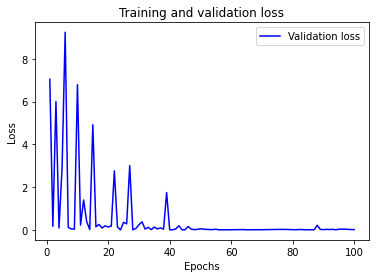

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'tanh', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'tanh'))
model.add(layers.Dense(6, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=100, batch_size=256, verbose=1)

Epoch 1/100
557/557 [==============================] - 2s 2ms/step - loss: 0.4106 - accuracy: 0.8594 - val_loss: 0.0257 - val_accuracy: 0.9987
Epoch 2/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9980 - val_loss: 0.0138 - val_accuracy: 0.9987
Epoch 3/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9980 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 4/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0141 - accuracy: 0.9982 - val_loss: 0.0107 - val_accuracy: 0.9987
Epoch 5/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.0103 - val_accuracy: 0.9987
Epoch 6/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9982 - val_loss: 0.0102 - val_accuracy: 0.9987
Epoch 7/100
557/557 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 0.0101 - val_accuracy: 0.9987

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

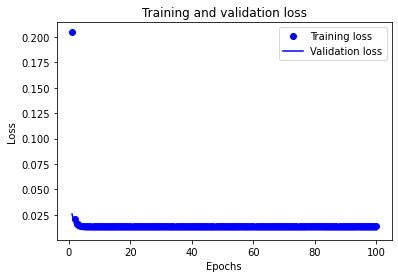

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=40, batch_size=512, verbose=1)

Epoch 1/40
279/279 [==============================] - 1s 3ms/step - loss: 427.4933 - accuracy: 0.6500 - val_loss: 7.7584 - val_accuracy: 0.9987
Epoch 2/40
279/279 [==============================] - 1s 2ms/step - loss: 2.3894 - accuracy: 0.9978 - val_loss: 6.5083 - val_accuracy: 0.9987
Epoch 3/40
279/279 [==============================] - 1s 2ms/step - loss: 0.7382 - accuracy: 0.9978 - val_loss: 4.7596 - val_accuracy: 0.9987
Epoch 4/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9960 - val_loss: 2.6414 - val_accuracy: 0.9987
Epoch 5/40
279/279 [==============================] - 1s 2ms/step - loss: 0.1291 - accuracy: 0.9972 - val_loss: 0.3811 - val_accuracy: 0.9987
Epoch 6/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9980 - val_loss: 0.2080 - val_accuracy: 0.9987
Epoch 7/40
279/279 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9983 - val_loss: 0.4509 - val_accuracy: 0.9987
Epoc

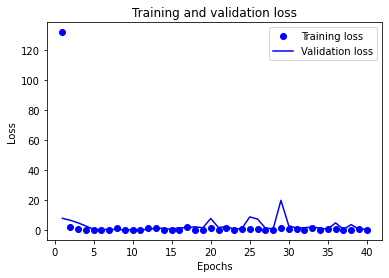

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ***Retraining the model with Regularizer***

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(10, activation = 'relu', kernel_regularizer= regularizers.l2(0.001), input_shape = (30,)))
model.add(layers.Dense(8, activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,validation_data= (X_val, Y_val),epochs=40, batch_size=512, verbose=1)

Epoch 1/40
279/279 [==============================] - 1s 3ms/step - loss: 0.8615 - accuracy: 0.9979 - val_loss: 0.2611 - val_accuracy: 0.9987
Epoch 2/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.9983 - val_loss: 0.3685 - val_accuracy: 0.9987
Epoch 3/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2257 - accuracy: 0.9983 - val_loss: 0.4310 - val_accuracy: 0.9987
Epoch 4/40
279/279 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.9983 - val_loss: 3.4463 - val_accuracy: 0.9987
Epoch 5/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9979 - val_loss: 23.2496 - val_accuracy: 0.0013
Epoch 6/40
279/279 [==============================] - 1s 2ms/step - loss: 0.2505 - accuracy: 0.9920 - val_loss: 1.3058 - val_accuracy: 0.9987
Epoch 7/40
279/279 [==============================] - 1s 2ms/step - loss: 0.1536 - accuracy: 0.9982 - val_loss: 0.1228 - val_accuracy: 0.9987
Epoch

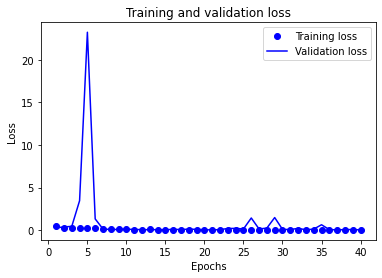

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

2670/2670 [==============================] - 4s 1ms/step - loss: 0.0144 - accuracy: 0.9983


In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction[0]

array([0.00066048], dtype=float32)

In [ ]:
prediction[0].shape

(1,)

In [ ]:
np.argmax(prediction[0])

0